## 1. Introduction

A dataset consisting of 12190 recipe in German which was scraped from the web is used to determine which group they belong to according to the ingredients. Since there is no label provided, unsupervised learning methods will be used. Initially, data will be cleaned and preprocessed before using Natural Language Processing(NLP) technique via Tf-idf vectorization to obtain importance of each ingredient accross all observations in the dataset. Thereafter, dimensions will be reduced from a higher dimension after vectorization to a lower dimension for K-Means Clustering and also t-SNE plot to visualize the clusters. Interactive plotting via plotly to better visualize the plots.

Note that, I have very little knowledge in the language and the recipes. However, the outcome may be interesting.

In [32]:
#import necessary libraries
import pandas as pd
import numpy as np
import json
import re
from nltk.tokenize import RegexpTokenizer, word_tokenize, sent_tokenize
from sklearn.feature_extraction.text import TfidfVectorizerfrom sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#open dataset
data = []
with open('../input/recipes.json') as f:
    for line in f:
        data.append(json.loads(line))

In [39]:
#read dataset
recipe = data[0]
df = pd.DataFrame(recipe)
df.head()

,Day,Ingredients,Instructions,Month,Name,Url,Weekday,Year
0,1,"[600 g Hackfleisch, halb und halb, 800 g Sauer...",Die Eier hart kochen. Dann pellen und mit eine...,January,Gebratener Hasenrücken,https://www.chefkoch.de/rezepte/185441079701305/,Thursday,2009
1,1,"[1 kg Strauchtomate(n), 1 Gemüsezwiebel(n), 1 ...",Vorab folgende Bemerkung: Alle Mengen sind Cir...,July,Pilz Stroganoff,https://www.chefkoch.de/rezepte/2718181424631245/,Saturday,2017
2,1,"[1 Glas Kirsche(n), 1 Pck. Vanillepuddingpulve...","Die Kirschen abtropfen lassen, dabei den Saft ...",January,Kaninchen a la Gioff,https://www.chefkoch.de/rezepte/46341015661368/,Monday,2007
3,1,"[500 g Spargel, grüner, 300 ml Brühe oder Fond...","Den Spargel säubern, die holzigen Enden abschn...",April,Spanisches Knoblauch-Kaninchen,https://www.chefkoch.de/rezepte/51051018014178/,Monday,2013
4,1,"[250 g Kohlrabi, 150 ml Gemüsebrühe, 150 ml Mi...",Kohlrabi schälen und klein würfeln. Mit der Br...,August,Gnocchi - Hack - Pfanne mit Basilikum,https://www.chefkoch.de/rezepte/1555771262860408/,Tuesday,2017


In [40]:
df.shape

(12190, 8)

## 2. Data Cleaning and Preprocessing

In [41]:
df = df.drop_duplicates(['Name'],keep='first')

In [42]:
df.shape

(192, 8)

In [43]:
df = df.drop(['Day','Month','Url','Weekday','Year'],axis=1)

df.head()

,Ingredients,Instructions,Name
0,"[600 g Hackfleisch, halb und halb, 800 g Sauer...",Die Eier hart kochen. Dann pellen und mit eine...,Gebratener Hasenrücken
1,"[1 kg Strauchtomate(n), 1 Gemüsezwiebel(n), 1 ...",Vorab folgende Bemerkung: Alle Mengen sind Cir...,Pilz Stroganoff
2,"[1 Glas Kirsche(n), 1 Pck. Vanillepuddingpulve...","Die Kirschen abtropfen lassen, dabei den Saft ...",Kaninchen a la Gioff
3,"[500 g Spargel, grüner, 300 ml Brühe oder Fond...","Den Spargel säubern, die holzigen Enden abschn...",Spanisches Knoblauch-Kaninchen
4,"[250 g Kohlrabi, 150 ml Gemüsebrühe, 150 ml Mi...",Kohlrabi schälen und klein würfeln. Mit der Br...,Gnocchi - Hack - Pfanne mit Basilikum


In [44]:
df['Ingredients'] = df['Ingredients'].apply(lambda x: ' '.join(x))

In [45]:
df.head()

,Ingredients,Instructions,Name
0,"600 g Hackfleisch, halb und halb 800 g Sauerkr...",Die Eier hart kochen. Dann pellen und mit eine...,Gebratener Hasenrücken
1,1 kg Strauchtomate(n) 1 Gemüsezwiebel(n) 1 Sal...,Vorab folgende Bemerkung: Alle Mengen sind Cir...,Pilz Stroganoff
2,"1 Glas Kirsche(n) 1 Pck. Vanillepuddingpulver,...","Die Kirschen abtropfen lassen, dabei den Saft ...",Kaninchen a la Gioff
3,"500 g Spargel, grüner 300 ml Brühe oder Fond (...","Den Spargel säubern, die holzigen Enden abschn...",Spanisches Knoblauch-Kaninchen
4,250 g Kohlrabi 150 ml Gemüsebrühe 150 ml Milch...,Kohlrabi schälen und klein würfeln. Mit der Br...,Gnocchi - Hack - Pfanne mit Basilikum


## 3. TOKENIZATION & VECTORIZATION

In [46]:
# Define a function to perform both stemming and tokenization
def tokenizer(text):
    
    # Tokenize by sentence, then by word
    tokens = [word for text in sent_tokenize(text) for word in word_tokenize(text)]
    
       
    # Filter out raw tokens to remove noise
    filtered_tokens = [token for token in tokens if re.match(r'[A-ZÄÖÜ][a-zäöüß]+', token)]
    
    return filtered_tokens

In [47]:
# Instantiate TfidfVectorizer object with stopwords and tokenizer parameters for efficient processing of text

tfidf_vectorizer = TfidfVectorizer(tokenizer=tokenizer,lowercase=False)

In [48]:
# Fit and transform the tfidf_vectorizer with the "plot" of each movie to create a vector representation of the plot summaries

tfidf_matrix = tfidf_vectorizer.fit_transform([x for x in df['Ingredients']])

print(tfidf_matrix.shape)

(192, 714)


## 4. K Means Clustering

Perform dimensional reduction before K Means Clustering

In [66]:
pca = PCA(n_components=5)
X = pca.fit_transform(tfidf_matrix.todense())

Estimate n_clusters using Elbow Method

Fit 2 clusters
Fit 3 clusters
Fit 4 clusters
Fit 5 clusters
Fit 6 clusters
Fit 7 clusters
Fit 8 clusters
Fit 9 clusters
Fit 10 clusters
Fit 11 clusters
Fit 12 clusters
Fit 13 clusters
Fit 14 clusters
Fit 15 clusters
Fit 16 clusters
Fit 17 clusters
Fit 18 clusters
Fit 19 clusters
Fit 20 clusters


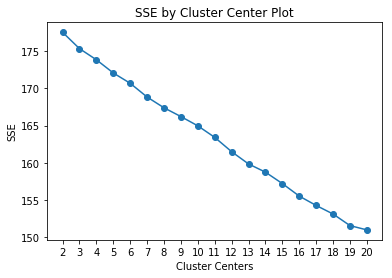

In [58]:
def find_optimal_clusters(data, max_k):
    iters = range(2, max_k+1, 1)
    
    sse = []
    for k in iters:
        sse.append(KMeans(n_clusters=k, random_state=20).fit(data).inertia_)
        print('Fit {} clusters'.format(k))
        
    f, ax = plt.subplots(1, 1)
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('SSE')
    ax.set_title('SSE by Cluster Center Plot')
    
find_optimal_clusters(tfidf_matrix, 20)

From cluster plot, there seems to be no change in direction of plot, 'elbow' is not visible. Hence, a random guess would be used for fitting and prediction in K Means.

In [83]:
clusters = KMeans(n_clusters=5, random_state=20).fit_predict(tfidf_matrix)

In [84]:
df['clusters'] = clusters
df.head()

,Ingredients,Instructions,Name,clusters
0,"600 g Hackfleisch, halb und halb 800 g Sauerkr...",Die Eier hart kochen. Dann pellen und mit eine...,Gebratener Hasenrücken,4
1,1 kg Strauchtomate(n) 1 Gemüsezwiebel(n) 1 Sal...,Vorab folgende Bemerkung: Alle Mengen sind Cir...,Pilz Stroganoff,3
2,"1 Glas Kirsche(n) 1 Pck. Vanillepuddingpulver,...","Die Kirschen abtropfen lassen, dabei den Saft ...",Kaninchen a la Gioff,0
3,"500 g Spargel, grüner 300 ml Brühe oder Fond (...","Den Spargel säubern, die holzigen Enden abschn...",Spanisches Knoblauch-Kaninchen,0
4,250 g Kohlrabi 150 ml Gemüsebrühe 150 ml Milch...,Kohlrabi schälen und klein würfeln. Mit der Br...,Gnocchi - Hack - Pfanne mit Basilikum,2


In [85]:
#plotting k-means clustering

trace_Kmeans = go.Scatter(x=X[:, 0], y= X[:, 1], mode="markers",
                    showlegend=False,
                    text = df['Name'],
                    hoverinfo = 'text',
                    marker=dict(
                            size=8,
                            color = clusters,
                            colorscale = 'Portland',
                            showscale=False, 
                            line = dict(
            width = 2,
            color = 'rgb(255, 255, 255)'
        )
                   ))
layout = dict(title = 'KMeans Clustering',
              hovermode= 'closest',
              yaxis = dict(zeroline = False),
              xaxis = dict(zeroline = False),
              showlegend= False,
              width=600,
              height=600,
             )

data = [trace_Kmeans]
fig1 = dict(data=data, layout= layout)
# fig1.append_trace(contour_list)
py.iplot(fig1, filename="svm")

*Note: Plot is interactive, hover for more details. Double to click to pan return*

Using n_clusters = 5, seems to be able to display a little distinction in clustering as shown in the K-Means plot.

## 5. T-SNE

In [80]:
tsne = TSNE()
tsne_results = tsne.fit_transform(tfidf_matrix.todense()) 

In [101]:
traceTSNE = go.Scatter(
    x = tsne_results[:,0],
    y = tsne_results[:,1],
#    name = Target,
#     hoveron = Target,
    mode = 'markers',
     text = df['Name'],
    hoverinfo = 'text',
    showlegend = True,
    marker = dict(
        size = 8,
        color = color_Target,
        colorscale ='Portland',
        showscale = False,
        line = dict(
            width = 2,
            color = 'rgb(255, 255, 255)'
        ),
        opacity = 0.8
    )
)
data = [traceTSNE]

layout = dict(title = 'TSNE (T-Distributed Stochastic Neighbour Embedding)',
              hovermode= 'closest',
              yaxis = dict(zeroline = False),
              xaxis = dict(zeroline = False),
              showlegend= True,
              autosize=False,
              width=600,
              height=600,
             )

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='styled-scatter')

*Note: Plot is interactive, hover for more details. Double to click to pan return*

## 6. Additional Information

In [88]:
def get_top_keywords(data, clusters, labels, n_terms):
    df = pd.DataFrame(data.todense()).groupby(clusters).mean()
    
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([labels[t] for t in np.argsort(r)[-n_terms:]]))
            
get_top_keywords(tfidf_matrix, clusters, tfidf_vectorizer.get_feature_names(), 5)


Cluster 0
Butter,Salz,Milch,Mehl,Ei

Cluster 1
Bund,Ingwer,Schweinelende,Frühlingszwiebel,Sojasauce

Cluster 2
Sahne,Salz,Öl,Pfeffer,Zwiebel

Cluster 3
Tomate,Kräuter,Salz,Tomatenmark,Pfeffer

Cluster 4
Knoblauch,Zehe/n,Pfeffer,Zitrone,Olivenöl


Obtaining key ingredients of each cluster may be able to provide some information about the recipes in each cluster.

## 7. Future work

Some other more detailed bag of words methods can be used to obtain better information about the ingredients. Other models perhaps deep learning models of neural networks might be able to provide a better clustering of observations.